In [14]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 

In [15]:
X, y = dataset["data"], dataset["target"] 

In [16]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [17]:
y

array([['5', '0', '4', ..., '4', '5', '6']], dtype=object)

In [18]:
Y_new[:,100] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [19]:
y[0,100]

'5'

In [20]:
m = 60000  
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

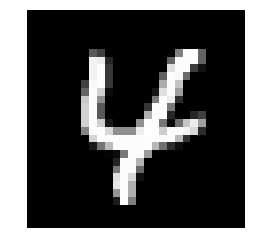

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [21]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [22]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [23]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [24]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [25]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.139868522963472
Epoch 100 cost:  0.8874291648324615
Epoch 200 cost:  0.6790020283240796
Epoch 300 cost:  0.5968843097008976
Epoch 400 cost:  0.548773532414422
Epoch 500 cost:  0.5167650565733409
Epoch 600 cost:  0.49410219533187627
Epoch 700 cost:  0.4766687986637281
Epoch 800 cost:  0.4614581240654032
Epoch 900 cost:  0.4530008787740656
Epoch 1000 cost:  0.44129614960558433
Epoch 1100 cost:  0.4361857816493921
Epoch 1200 cost:  0.42984199537538215
Epoch 1300 cost:  0.42459826895239466
Epoch 1400 cost:  0.42126036836993663
Epoch 1500 cost:  0.4139486429399024
Epoch 1600 cost:  0.41088765979133146
Epoch 1700 cost:  0.4059006124072591
Epoch 1800 cost:  0.40179452915576397
Epoch 1900 cost:  0.40430650632140697
Final cost: 0.39882165793051233


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 920    0   20    7    3   22   19    5    9   13]
 [   0 1098    5    6    3    2    5   12   11    7]
 [   4    5  837   35    6    9   16   25   15    8]
 [   4    3   41  843    1   59    1   15   45   14]
 [   4    1   25    3  821   10   20   18   15   84]
 [  17    1    3   42    6  711   19    4   29   15]
 [  14    5   27    6   18   14  867    2   15    7]
 [   7    4   25   17   10   16    4  889   18   42]
 [   9   18   45   38    8   38    7   12  793   14]
 [   1    0    4   13  106   11    0   46   24  805]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1018
           1       0.97      0.96      0.96      1149
           2       0.81      0.87      0.84       960
           3       0.83      0.82      0.83      1026
           4       0.84      0.82      0.83      1001
           5       0.80      0.84      0.82       847
           6       0.91      0.89      0.90       975
           7       0.86      0.86   